In [1]:
import pandas as pd
df = pd.read_csv('abcnews-date-text.csv')
df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1103660,20171231,the ashes smiths warners near miss liven up bo...
1103661,20171231,timelapse: brisbanes new year fireworks
1103662,20171231,what 2017 meant to the kids of australia
1103663,20171231,what the papodopoulos meeting may mean for ausus


In [2]:
import pandas as pd
df = pd.read_csv('abcnews-date-text.csv', usecols=['headline_text'], nrows=10000)
df

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
9995,us units attack palace as fighting rages in heart
9996,vasco win 10 goal thriller in brazil on edmundos
9997,vic bushfires inquiry begins
9998,vic govt plan aims to reduce water use


In [3]:
msg = df.headline_text
msg

0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
9995    us units attack palace as fighting rages in heart
9996     vasco win 10 goal thriller in brazil on edmundos
9997                         vic bushfires inquiry begins
9998               vic govt plan aims to reduce water use
9999            vic govt urged to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [4]:
msg = msg.str.replace("[^a-zA-Z0-9 ]+","",regex=True)
msg

0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
9995    us units attack palace as fighting rages in heart
9996     vasco win 10 goal thriller in brazil on edmundos
9997                         vic bushfires inquiry begins
9998               vic govt plan aims to reduce water use
9999            vic govt urged to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [5]:
# stemming
import nltk

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
msg = msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token: " ".join(token)) # first lambda creates a list, 2nd lambda writes like a sentence
msg

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aiswa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


0          aba decid against communiti broadcast licenc
1                    act fire wit must be awar of defam
2             a g call for infrastructur protect summit
3              air nz staff in aust strike for pay rise
4             air nz strike to affect australian travel
                             ...                       
9995        us unit attack palac as fight rage in heart
9996    vasco win 10 goal thriller in brazil on edmundo
9997                          vic bushfir inquiri begin
9998               vic govt plan aim to reduc water use
9999            vic govt urg to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [6]:
# remove stop words

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiswa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
msg = msg.apply(lambda line:[token for token in word_tokenize(line) if token not in sw]).apply(lambda token: " ".join(token))
msg

0            aba decid communiti broadcast licenc
1                    act fire wit must awar defam
2             g call infrastructur protect summit
3               air nz staff aust strike pay rise
4          air nz strike affect australian travel
                          ...                    
9995        us unit attack palac fight rage heart
9996    vasco win 10 goal thriller brazil edmundo
9997                    vic bushfir inquiri begin
9998            vic govt plan aim reduc water use
9999         vic govt urg green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [8]:
# remove words <3 characters
msg = msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>=3]).apply(lambda token: " ".join(token))
msg

0         aba decid communiti broadcast licenc
1                 act fire wit must awar defam
2            call infrastructur protect summit
3               air staff aust strike pay rise
4          air strike affect australian travel
                         ...                  
9995        unit attack palac fight rage heart
9996    vasco win goal thriller brazil edmundo
9997                 vic bushfir inquiri begin
9998         vic govt plan aim reduc water use
9999      vic govt urg green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [9]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vect = vectorizer.fit_transform(msg)
print(vect)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50879 stored elements and shape (10000, 7053)>
  Coords	Values
  (0, 3644)	0.47027473375751233
  (0, 943)	0.47799782429829546
  (0, 1443)	0.35278224419585436
  (0, 1768)	0.40673400368770146
  (0, 146)	0.5103644709222088
  (1, 1782)	0.4921756808813915
  (1, 560)	0.4729217098434841
  (1, 4163)	0.38964572098383743
  (1, 6935)	0.4256166321182425
  (1, 2449)	0.2871157610862832
  (1, 198)	0.34452777801914436
  (2, 6082)	0.5074623354708966
  (2, 4891)	0.49596149094917574
  (2, 3211)	0.603843955663636
  (2, 1060)	0.3631482545495525
  (3, 5275)	0.4032865311963851
  (3, 4573)	0.40863442085309437
  (3, 6025)	0.40126174130834125
  (3, 538)	0.3808058275033573
  (3, 5921)	0.4671270723556268
  (3, 269)	0.38229062089434696
  (4, 6443)	0.4946246151090834
  (4, 542)	0.4138785263344187
  (4, 236)	0.49773233288998325
  (4, 6025)	0.41987466825482267
  :	:
  (9995, 6601)	0.38380819329854754
  (9996, 2123)	0.4880040186486571
  (9996, 6679)	0.48800

c:\Users\aiswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aiswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aiswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\aiswa\AppData\Local\Programs\Python\P

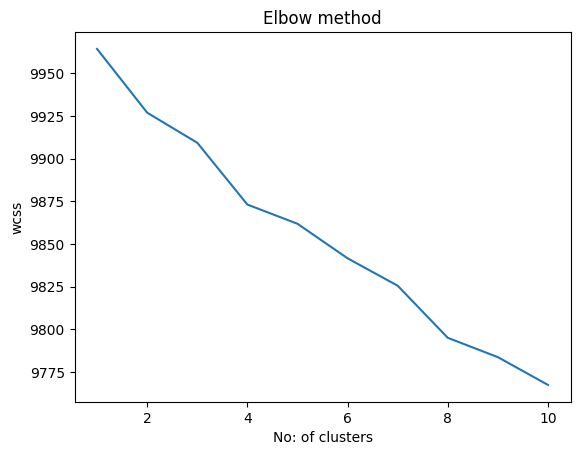

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(vect)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No: of clusters')
plt.ylabel('wcss')

plt.savefig('elbow.png')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=8, random_state=0)
y = kmeans.fit_predict(vect)
y

array([1, 1, 2, ..., 1, 7, 7])

In [12]:
df['cluster'] = y
df

,headline_text,cluster
0,aba decides against community broadcasting lic...,1
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,1
4,air nz strike to affect australian travellers,1
...,...,...
9995,us units attack palace as fighting rages in heart,1
9996,vasco win 10 goal thriller in brazil on edmundos,1
9997,vic bushfires inquiry begins,1
9998,vic govt plan aims to reduce water use,7


In [13]:
df['cluster'].value_counts()

cluster
1    7947
3     445
5     365
6     337
2     331
7     320
4     203
0      52
Name: count, dtype: int64

In [14]:
# create df0 with cluster 0

df0 = df.loc[df['cluster']==0]
df0

,headline_text,cluster
172,stop changing the rules fans tell afl,0
190,wales coach accuses players of belittling red,0
361,players continue zimbabwe protest,0
552,indian players to retrace gandhi journey,0
564,langer named one day player of year,0
862,end protest or face the axe zimbabwe players told,0
1465,afl to examine warne anti doping findings,0
1709,zimbabwes flower saved by player revolt source,0
2381,brazilian team has 11 players sent off,0
2760,afl dismisses coaches travel concerns,0


In [15]:
df1 = df.loc[df['cluster']==1]
df1

,headline_text,cluster
0,aba decides against community broadcasting lic...,1
1,act fire witnesses must be aware of defamation,1
3,air nz staff in aust strike for pay rise,1
4,air nz strike to affect australian travellers,1
5,ambitious olsson wins triple jump,1
...,...,...
9992,us says baghdad attack a raid battles ahead,1
9994,us seizes three presidential palaces,1
9995,us units attack palace as fighting rages in heart,1
9996,vasco win 10 goal thriller in brazil on edmundos,1
